# <center> Data Analysis Project </center>
# by
# Darshkumar Patel (student id: 235841910)
# Kabir Patel (student id: 235842420)

# Supply Chain Management Analysis

<b>Dataset:</b> https://data.mendeley.com/datasets/8gx2fvg2k6/5<br>
This is the dataset of Supply Chains used by the company DataaCo Global which includes a collection of their products sold, finacial details(profit, loss, total sales etc.), Shipping details, and customer details such as sales, demographics, and transaction details. The data spans to 91 MB engulfing details of 180,520 customers spanning to 53 columns related to Clothing , Sports,and Electronic Supplies.

E-commerce goods Late delivery risk identification by predicting fastest and normal Shipping Durations. We will build best model that will enable E-commerce and Goods/products delivery industries to identify the 'risk of late delivery' and predict the fastest and normal duration of goods shipment for their Inland and foreign clients/ customers/buyers.

## Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

## Using the Dataset

In [2]:
df =  pd.read_csv("DataCoSupplyChainDataset.csv", encoding='unicode_escape')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## EDA (Exploratory Data Analysis)

In [3]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
missing_values_df=df.isnull().sum()

In [6]:
# Trying to understand the Dataset here
def dataset(data):
    print('1) Number of Columns in the Dataset are:', data.shape[1])
    print('2) Number of Rows in the Dataset are:', data.shape[0])
    print('3) Total Number od Datapoints are:',data.size)
    numerical_features = [num for num in data.columns if data[num].dtype!='O']
    print('4) Number of Numerical Features:', len(numerical_features))
    nominal_features = [nom for nom in data.columns if data[nom].dtype=='O']
    print('5) Number of Nominal Features:',len(nominal_features))
dataset(df)

1) Number of Columns in the Dataset are: 53
2) Number of Rows in the Dataset are: 180519
3) Total Number od Datapoints are: 9567507
4) Number of Numerical Features: 29
5) Number of Nominal Features: 24


In [7]:
# Working on missing values
for col,val in missing_values_df.items():
    if(val>0):
        print(f"Column {col} has {val} missing values.")

Column Customer Lname has 8 missing values.
Column Customer Zipcode has 3 missing values.
Column Order Zipcode has 155679 missing values.
Column Product Description has 180519 missing values.


In [8]:
# Now we will be replacing the mssing values

# Filling the below column with "Not Determined"
df["Customer Lname"]= df["Customer Lname"].fillna("Not Determined")
df["Customer Full Name"] = df["Customer Fname"].astype(str) + df["Customer Lname"].astype(str)

# Filling the Below columns with 0
df["Customer Zipcode"]= df["Customer Zipcode"].fillna(0)
df["Order Zipcode"]= df["Order Zipcode"].fillna(0)

In [9]:
# Lets Know what are our Numerical and Nominal Features
numerical_features = [num for num in df.columns if df[num].dtype!='O']
nominal_features = [nom for nom in df.columns if df[nom].dtype=='O']
print('Numerical Features:')
for x in numerical_features:
    print(x)
print()
print('Nominal Features:')
for x in nominal_features:
    print(x)

Numerical Features:
Days for shipping (real)
Days for shipment (scheduled)
Benefit per order
Sales per customer
Late_delivery_risk
Category Id
Customer Id
Customer Zipcode
Department Id
Latitude
Longitude
Order Customer Id
Order Id
Order Item Cardprod Id
Order Item Discount
Order Item Discount Rate
Order Item Id
Order Item Product Price
Order Item Profit Ratio
Order Item Quantity
Sales
Order Item Total
Order Profit Per Order
Order Zipcode
Product Card Id
Product Category Id
Product Description
Product Price
Product Status

Nominal Features:
Type
Delivery Status
Category Name
Customer City
Customer Country
Customer Email
Customer Fname
Customer Lname
Customer Password
Customer Segment
Customer State
Customer Street
Department Name
Market
Order City
Order Country
order date (DateOrders)
Order Region
Order State
Order Status
Product Image
Product Name
shipping date (DateOrders)
Shipping Mode
Customer Full Name


In [10]:
# Lets Work With Numerical Features
df[numerical_features].describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35920.529950,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,7626.815609,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.434755,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,22466.630103,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,0.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,0.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,0.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,0.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,0.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


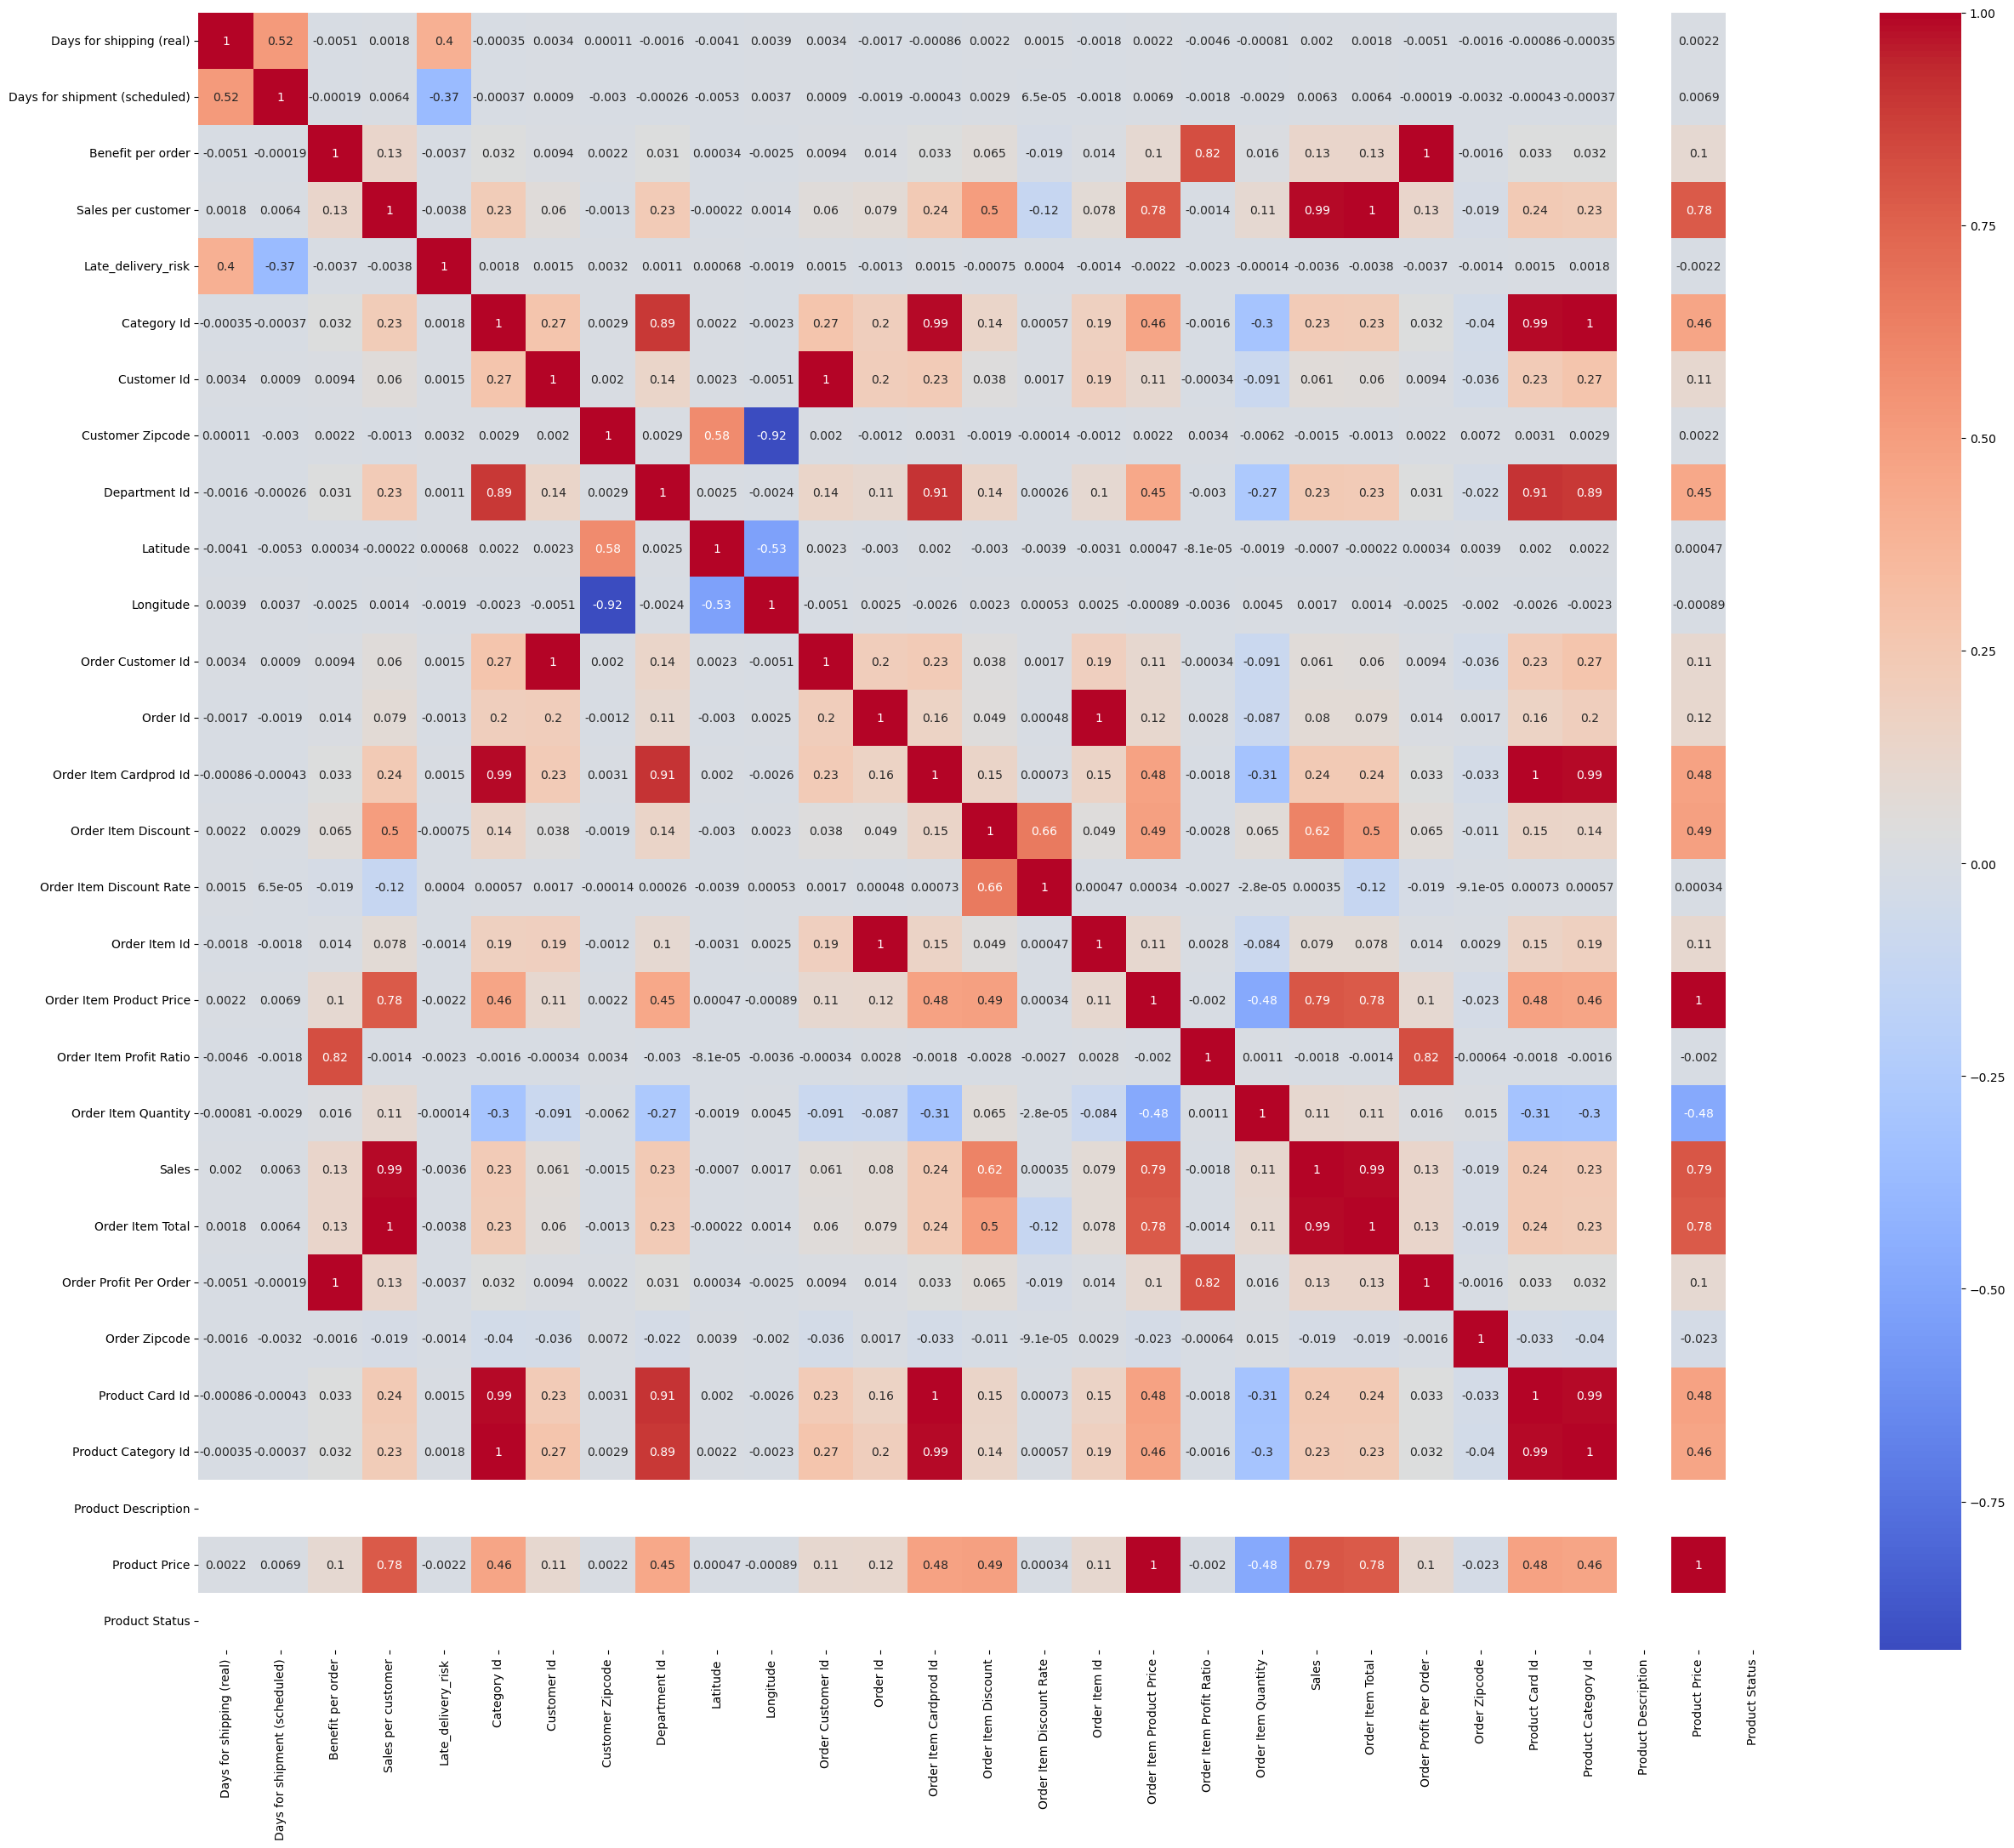

In [11]:
# Now Lets Find the Relationaship between the Columns of The Data set using heatmap
corrleation_map = df[df.select_dtypes(include=[np.number]).columns].corr()
top= corrleation_map.index
plt.figure(figsize=(30,25))
g=sns.heatmap(df[top].corr(), annot=True, cmap="coolwarm")

Insights from the Heatmap:
1) We can say that From the Heat Map we can find the corelationship between the columns and Below columns are similar:

- [Benefit per order], Order Profit per order
- [Sales per customer], Sales, Order Item Total
- [Category ID], Product Category ID, Order Customer ID, Order Item Category ID, Product card ID,
- [Order Item Product Price], Product Price

2) Similary there are few Columns which show negative Correlationship:
- Product Description
- Product Status


## Data Visualization

In [27]:
# Before Jumping on Visualization We will be using only  Impotant Features based on the Heatmap we got.
data=df.copy()
feature_list=['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']
df1=df[feature_list]
print("Before Removing few features the size of dataset was: ",df.shape)
print("Afer Removing few features the shape is: ",df1.shape)
# 'Days for shipping (real)'
# 'Days for shipment (scheduled)'
# 'Category Id'
# 'Customer Email'
# 'Customer Fname'
# 'Customer Lname'
# 'Customer Password'
# 'Customer Street'
# 'Department Id'
# The reason we Have removed the Above column is because they will not be utilized further in our Visualiztion process

Before Removing few features the size of dataset was:  (180519, 61)
Afer Removing few features the shape is:  (180519, 44)


## Now Lets Draw some Important Visuals For Better Understanding of the dataset.

### Delivery Status

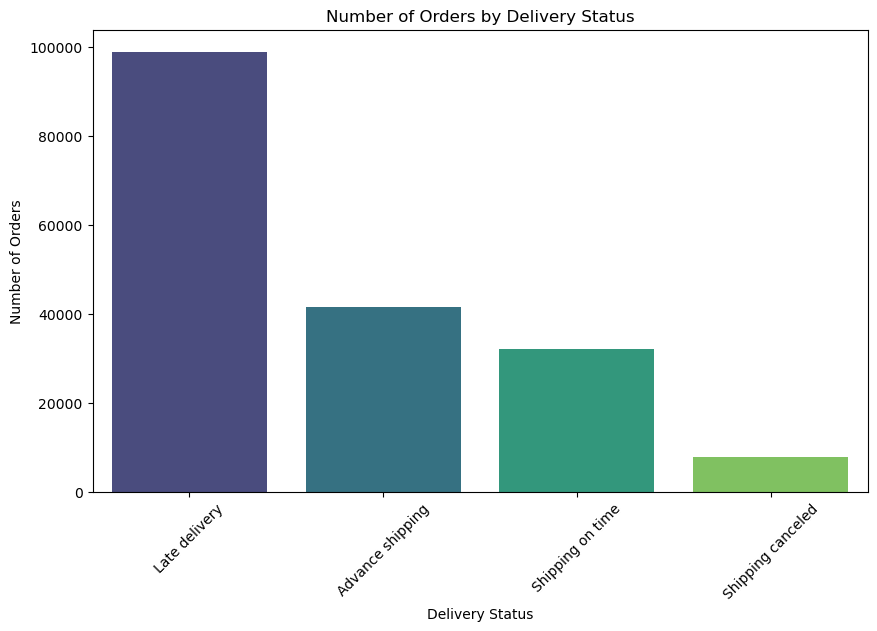

In [13]:
delivery_status= df1.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Delivery Status', y='Number of Orders', data=delivery_status, palette='viridis')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Delivery Status')
plt.xticks(rotation=45)
plt.show()
# DataFrame (delivery_status) shows the count of orders for each 'Delivery Status',
# sorted in descending order of the number of orders.

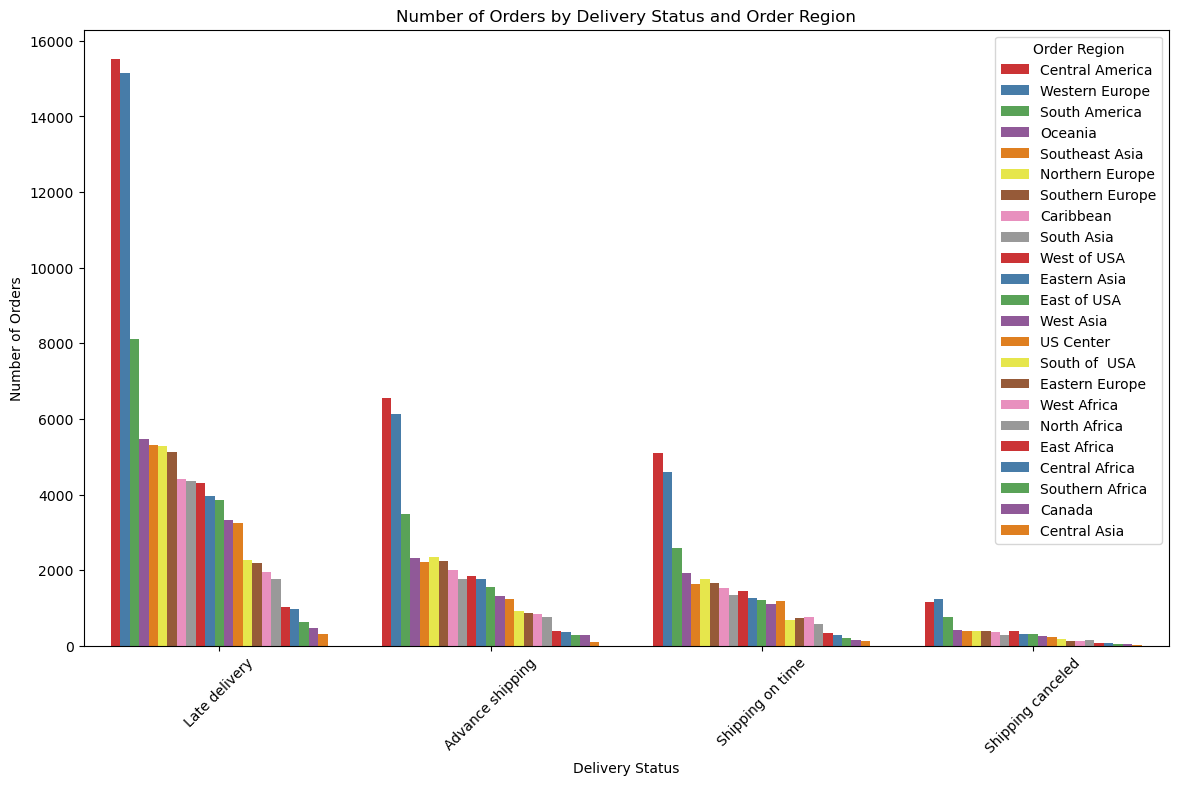

In [14]:
delivery_status_region=df1.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)

plt.figure(figsize=(14, 8))
sns.barplot(x='Delivery Status', y='Number of Orders', hue='Order Region', data=delivery_status_region,palette='Set1')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Delivery Status and Order Region')
plt.xticks(rotation=45)
plt.legend(title='Order Region', bbox_to_anchor=(1, 1))
plt.show()

From Above Visuals we can say that most number of orders Belonged to Late Deilvery status.
Central America and Western Europe were having higher number of order count in All the Delivery Status.

### Lets Draw few Visuals for Top Customers.

C:\Users\darsh\AppData\Local\Temp\ipykernel_15864\3611444887.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



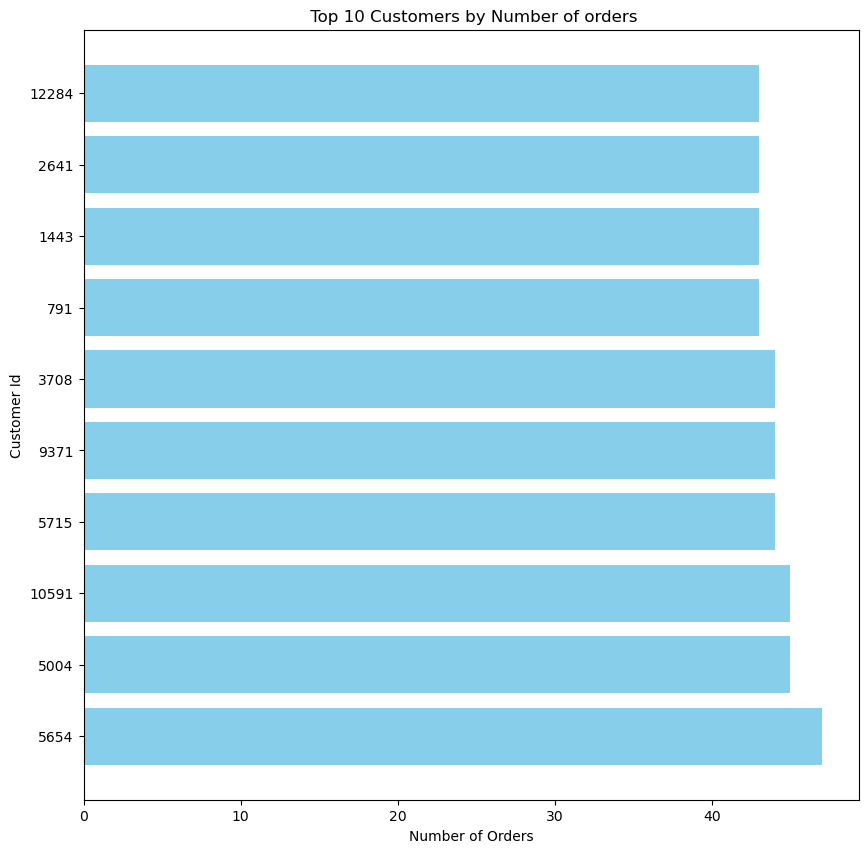

In [15]:
df1['Customer Id str']= df1['Customer Id'].astype(str)

customer_info = df1.groupby(['Customer Id str'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)

plt.figure(figsize=(10,10))
plt.barh(customer_info.head(10)['Customer Id str'],customer_info.head(10)['Number of Orders'], color = 'skyblue')
plt.xlabel('Number of Orders')
plt.ylabel('Customer Id')
plt.title(" Top 10 Customers by Number of orders")
plt.show()

### Lets see from what segement the customer who order things Belongs

In [16]:
customer_segment = df1.groupby(['Customer Segment'])['Order Id'].count().reset_index(name="Number of Orders").sort_values(by="Number of Orders", ascending = False)

px.pie(customer_segment, values="Number of Orders", names ="Customer Segment", 
       title="Number of order by Customers from different Sector", height=600, width=600)

### Category of products

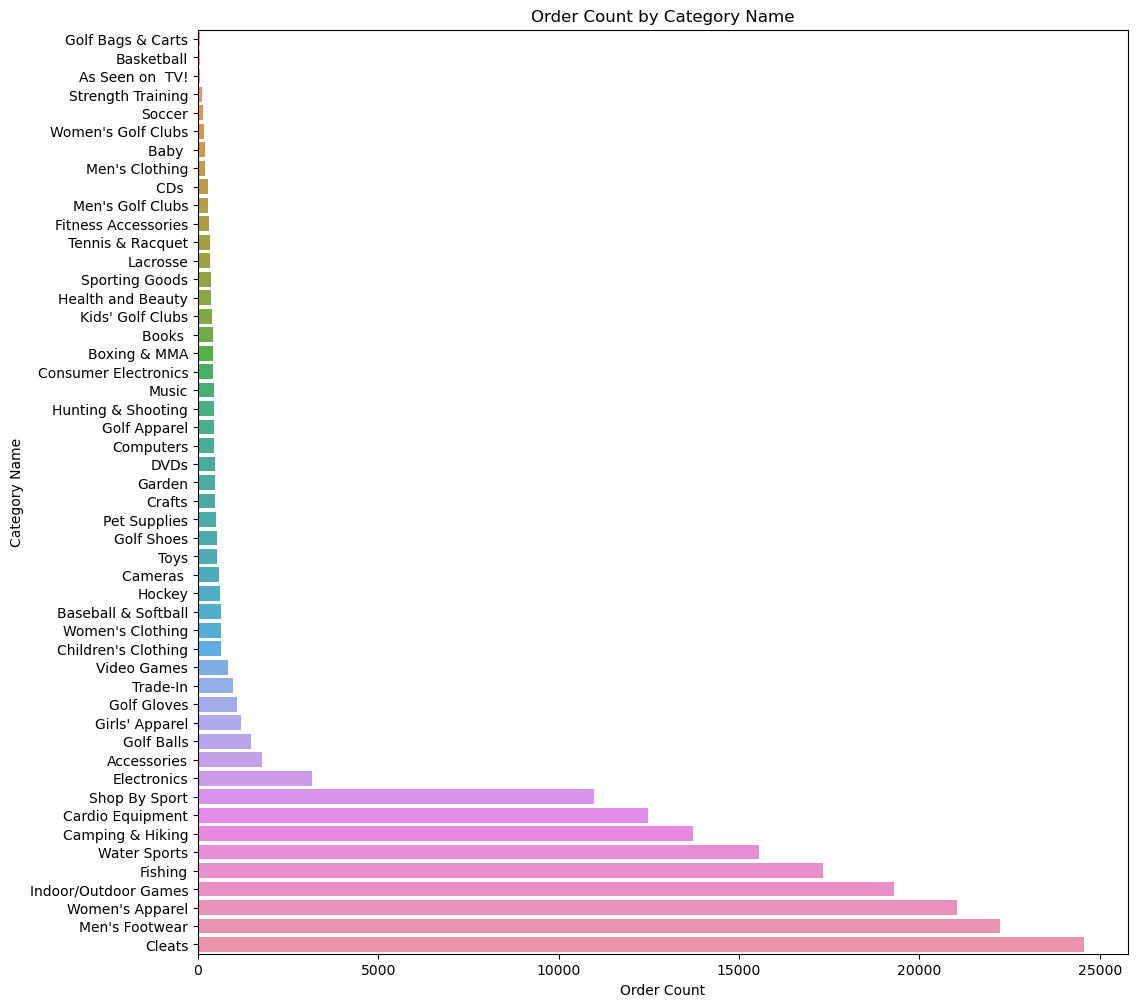

In [17]:
category_name = df1.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders', ascending=True)

plt.figure(figsize=(12,12))
sns.barplot(x="Number of Orders", y="Category Name",data=category_name)
plt.xlabel('Order Count')
plt.ylabel('Category Name')
plt.title("Order Count by Category Name")
plt.show()


### Lets Talk About which Country Made How Many Orders

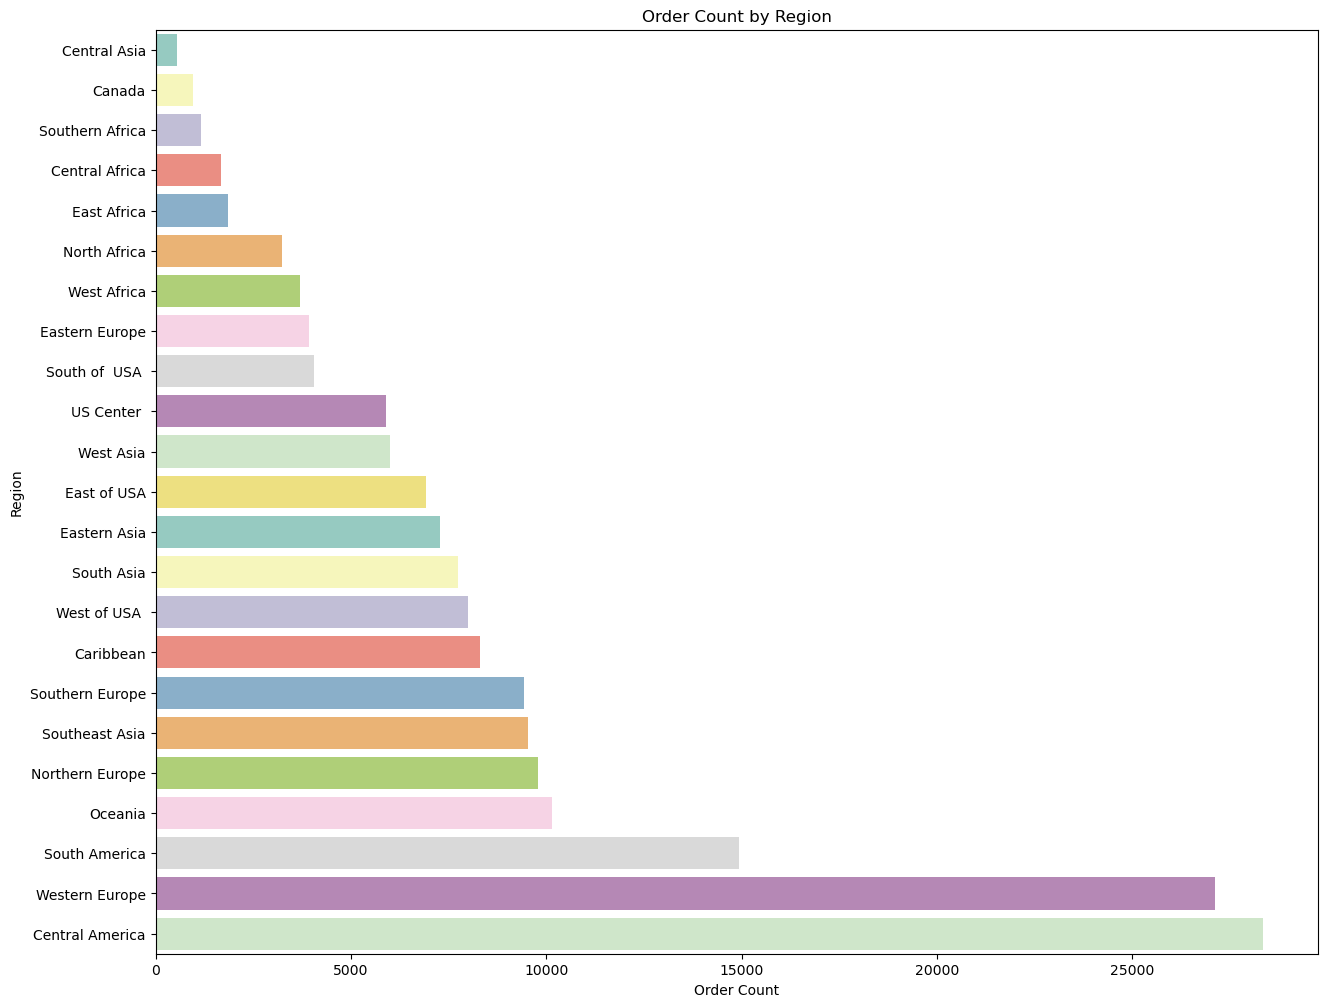

In [18]:
order_region=df1.groupby(['Order Region'])['Order Id'].count().reset_index(name="Number of Orders").sort_values(by="Number of Orders",ascending=True)

plt.figure(figsize=(15,12))
sns.barplot(x="Number of Orders", y="Order Region", data=order_region,palette="Set3")
plt.xlabel("Order Count")
plt.ylabel("Region")
plt.title("Order Count by Region")
plt.show()

### Lets see which Country has most profit from the Orders

In [37]:
df_geo=df1.groupby(['Order Country','Order City'])['Order Id'].count().reset_index(name="Profit of Orders").sort_values(by="Profit of Orders", ascending=False)

In [38]:
fig = px.choropleth(df_geo ,  locationmode='country names', locations='Order Country',
                    color='Profit of Orders', # lifeExp is a column of data
                    hover_name='Order Country', 
                    #hover_data ='Order City',
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

### Lets Jump on Sales Analysis

In [35]:
df_sales_country = df1.groupby(['Order Country'])['Sales'].sum().reset_index(name='Sales of Order').sort_values('Sales of Order', ascending=False)
color_map1 = {'Sales of Order': 'green'}
fig=px.bar(df_sales_country.head(10), x='Sales of Order',y='Order Country', color='Sales of Order',color_discrete_map=color_map1)
fig.show()

In [34]:
df_sales_category= df1.groupby(['Category Name'])['Sales'].sum().reset_index(name="Sales of Order").sort_values(by="Sales of Order", ascending=False)
px.bar(df_sales_category, x = 'Sales of Order', y='Category Name', color="Sales of Order")

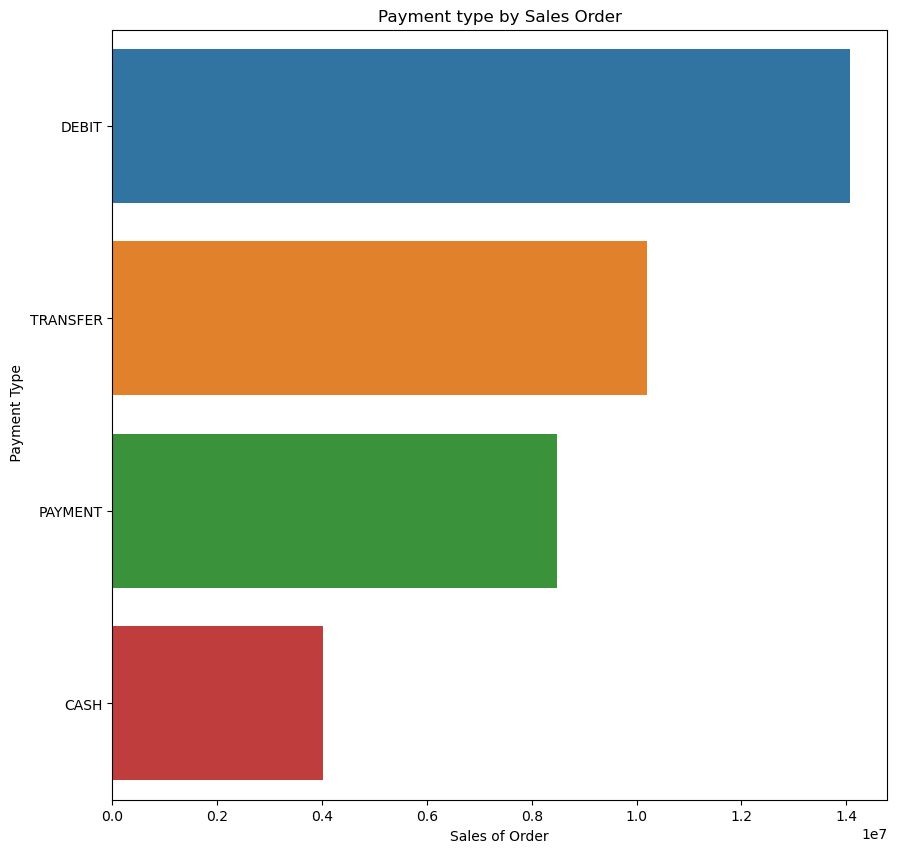

In [23]:
df_sales_payment_type=df1.groupby(['Type'])['Sales'].sum().reset_index(name="Sales of Order").sort_values(by='Sales of Order', ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x='Sales of Order',y='Type',data=df_sales_payment_type)
plt.xlabel('Sales of Order')
plt.ylabel(' Payment Type')
plt.title('Payment type by Sales Order')
plt.show()
# The Sales of Order is in millions

C:\Users\darsh\AppData\Local\Temp\ipykernel_15864\2733639242.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Total Sales')

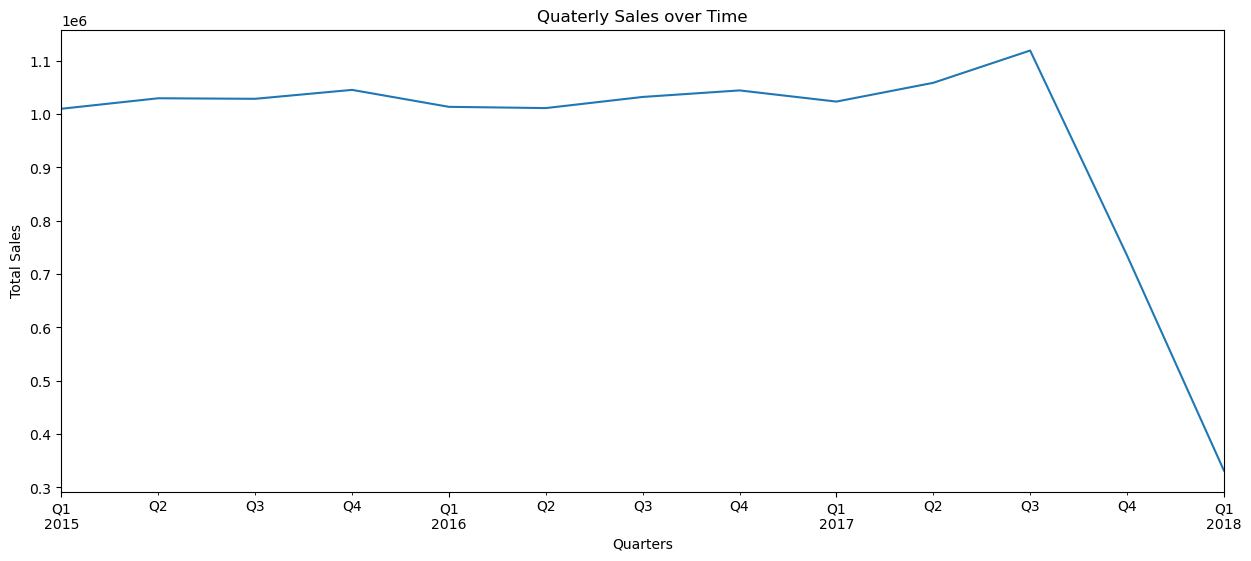

In [24]:
df1['order_month_year'] = pd.to_datetime(df1['order date (DateOrders)']).dt.to_period('M')
quater= df1.groupby('order_month_year')
quartersales=quater['Sales'].sum().resample('Q').mean().plot(figsize=(15,6))
quartersales.set_title("Quaterly Sales over Time")
quartersales.set_xlabel("Quarters")
quartersales.set_ylabel("Total Sales")
# The Graph shows from 2015 to the second lad quater of 2017 the sales was almost similar but It took a dip from the
# last quater of 2017


C:\Users\darsh\AppData\Local\Temp\ipykernel_7072\56571084.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\darsh\AppData\Local\Temp\ipykernel_7072\56571084.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\darsh\AppData\Local\Temp\ipykernel_7072\56571084.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

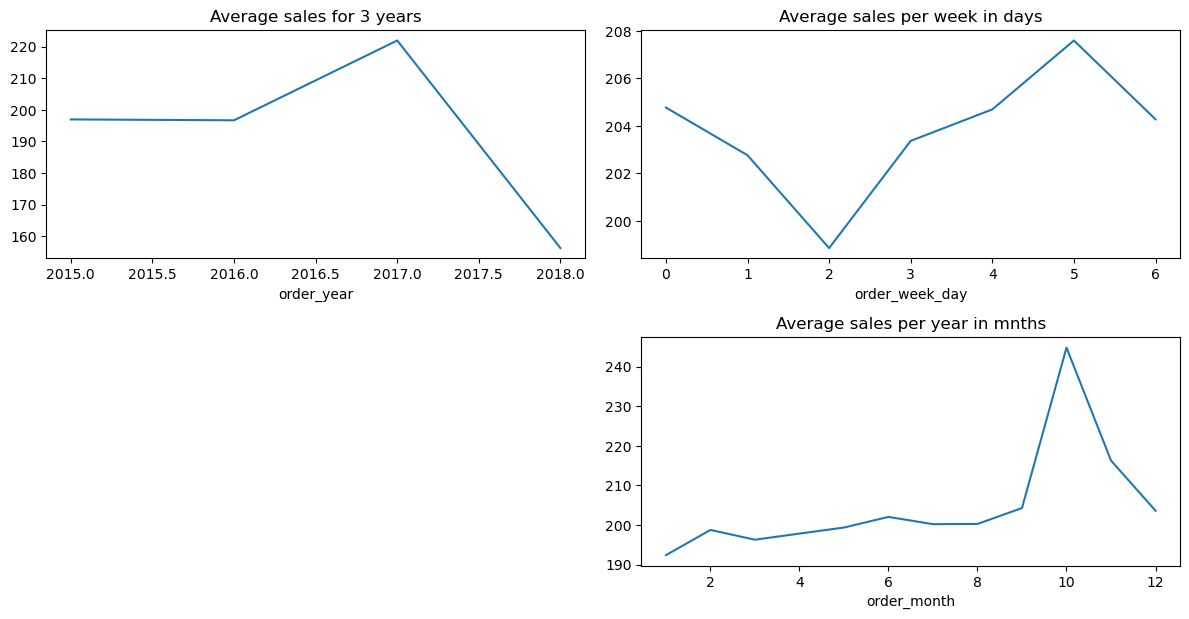

In [31]:
df1['order_year']= pd.DatetimeIndex(df1['order date (DateOrders)']).year
df1['order_month'] = pd.DatetimeIndex(df1['order date (DateOrders)']).month
df1['order_week_day'] = pd.DatetimeIndex(df1['order date (DateOrders)']).weekday
df1['order_hour'] = pd.DatetimeIndex(df1['order date (DateOrders)']).hour
df1['order_month_year'] = pd.to_datetime(df1['order date (DateOrders)']).dt.to_period('M')
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= df1.groupby('order_year')
quater['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=df1.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')

plt.subplot(4, 2, 4)
mnth=df1.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Category Name')

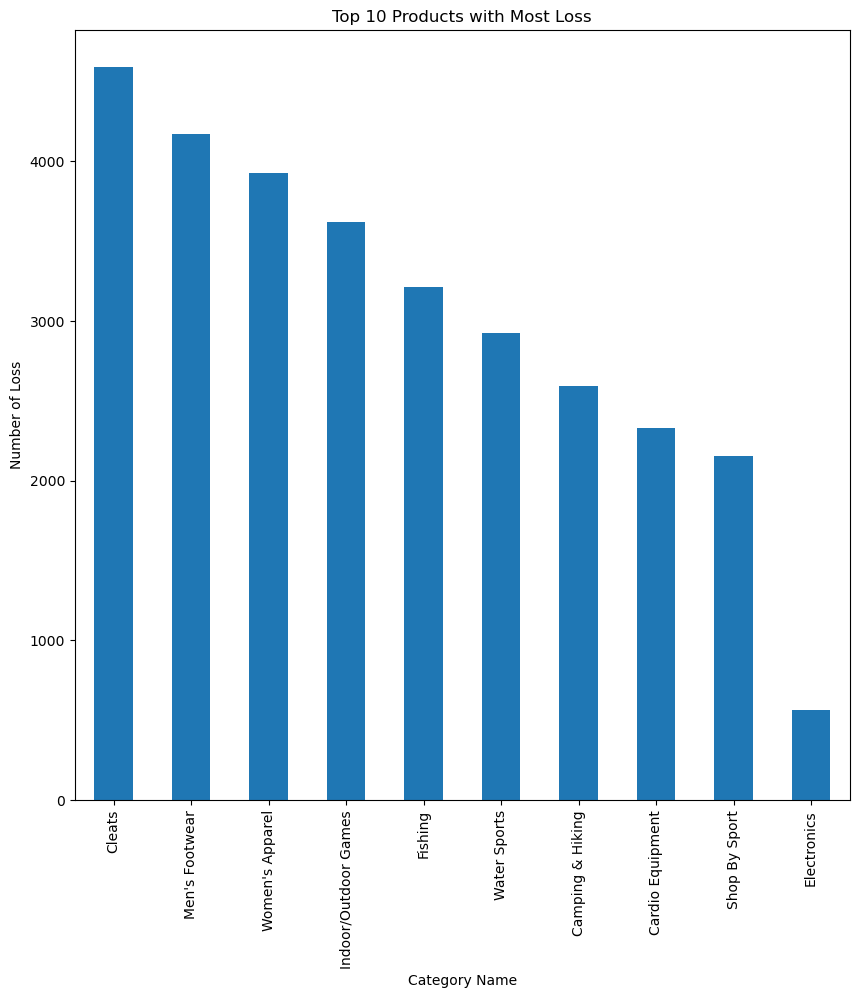

In [25]:
# Checking out prodcuts with most loss
loss=df1[df1['Benefit per order']<0]

plt.figure(figsize=(10, 10))
loss['Category Name'].value_counts().nlargest(10).plot.bar()
plt.title("Top 10 Products with Most Loss")
plt.ylabel("Number of Loss")
plt.xlabel("Category Name")

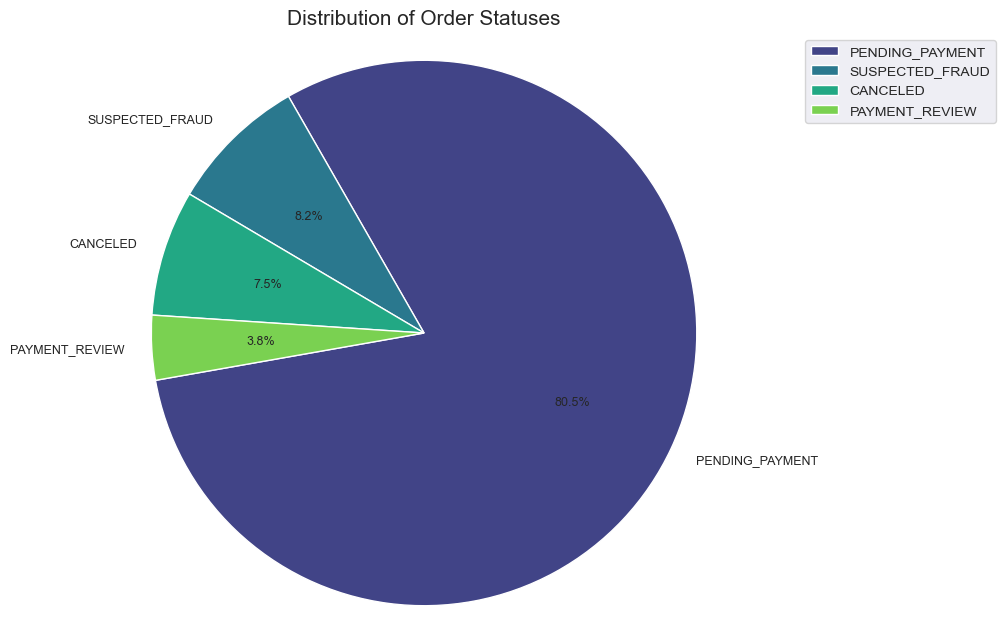

In [26]:
# Order Status
sns.set_palette("viridis")
sns.set_style("darkgrid")

# Filter the dataframe for relevant order statuses
relevant_statuses = ['SUSPECTED_FRAUD', 'CANCELED', 'COMPLETED', 'PENDING_PAYMENT', 'PAYMENT_REVIEW']
df_filtered = df[df['Order Status'].isin(relevant_statuses)]

# Get the counts of each order status
status_counts = df_filtered['Order Status'].value_counts()

# Create a color palette with the same number of colors as there are order statuses
colors = sns.color_palette("viridis", len(status_counts))

# Plotting the pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=190)

# Setting the font size for labels and percentages in the pie chart
for text in texts + autotexts:
    text.set_fontsize(9)

# Setting the title with a custom font size
plt.title('Distribution of Order Statuses', fontsize=15)

# Ensuring the pie chart is circular
plt.axis('equal')

# Adjusting the legend's position and size
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting subplot parameters to give the pie chart more room
plt.subplots_adjust(top=0.85, left=0.1, bottom=0.1, right=0.95)

# Display the plot
plt.show()

Lets talk about the fraud . Which region has highest suspectedfraud

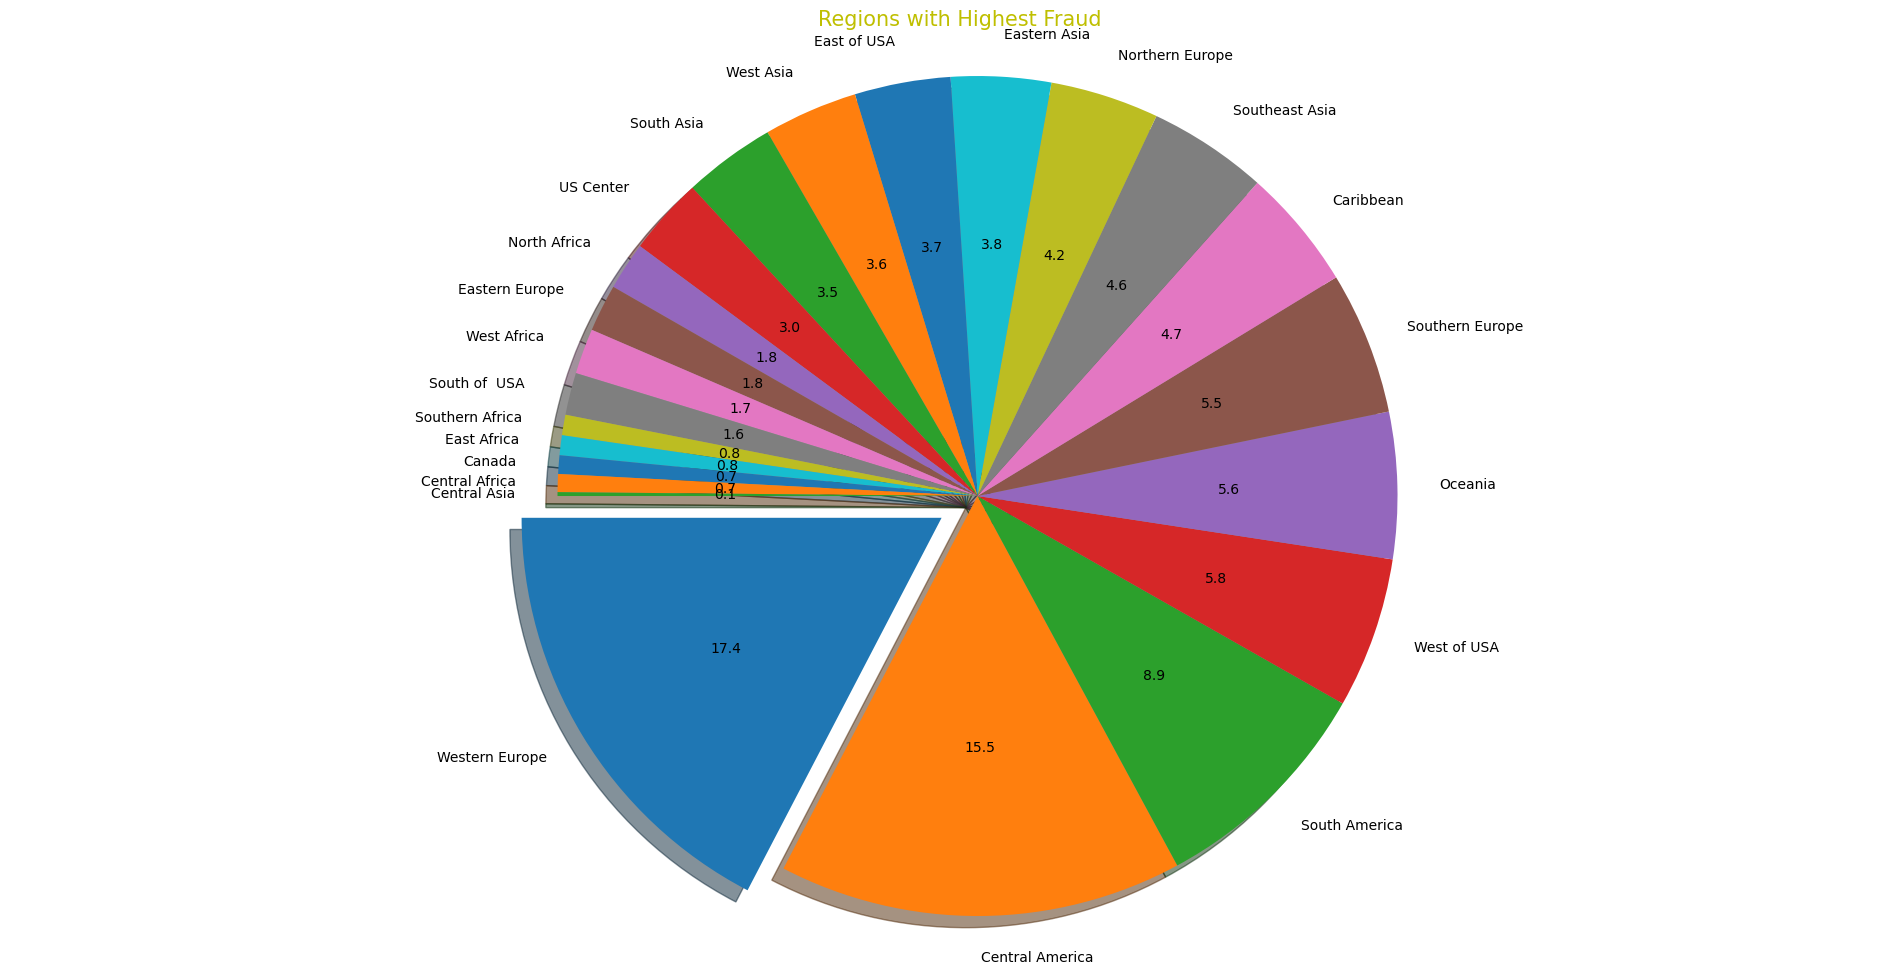

In [32]:
high_fraud = df1[(df1['Order Status'] == 'SUSPECTED_FRAUD') & (df1['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=high_fraud['Order Region'].value_counts().plot.pie(figsize=(24,12),
                                                  startangle=180, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud",size=15,color='y') # Plotting title
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

Lets Talk about the late Delivery stuff
Delivering products to customer on time without late delivery is another important aspect for a supply chain company because customers will not be satisfied if products are not delivered on time. What category of products are being delivered late the most?

<Axes: title={'center': 'Top 10 products with most late deliveries'}, xlabel='Category Name'>

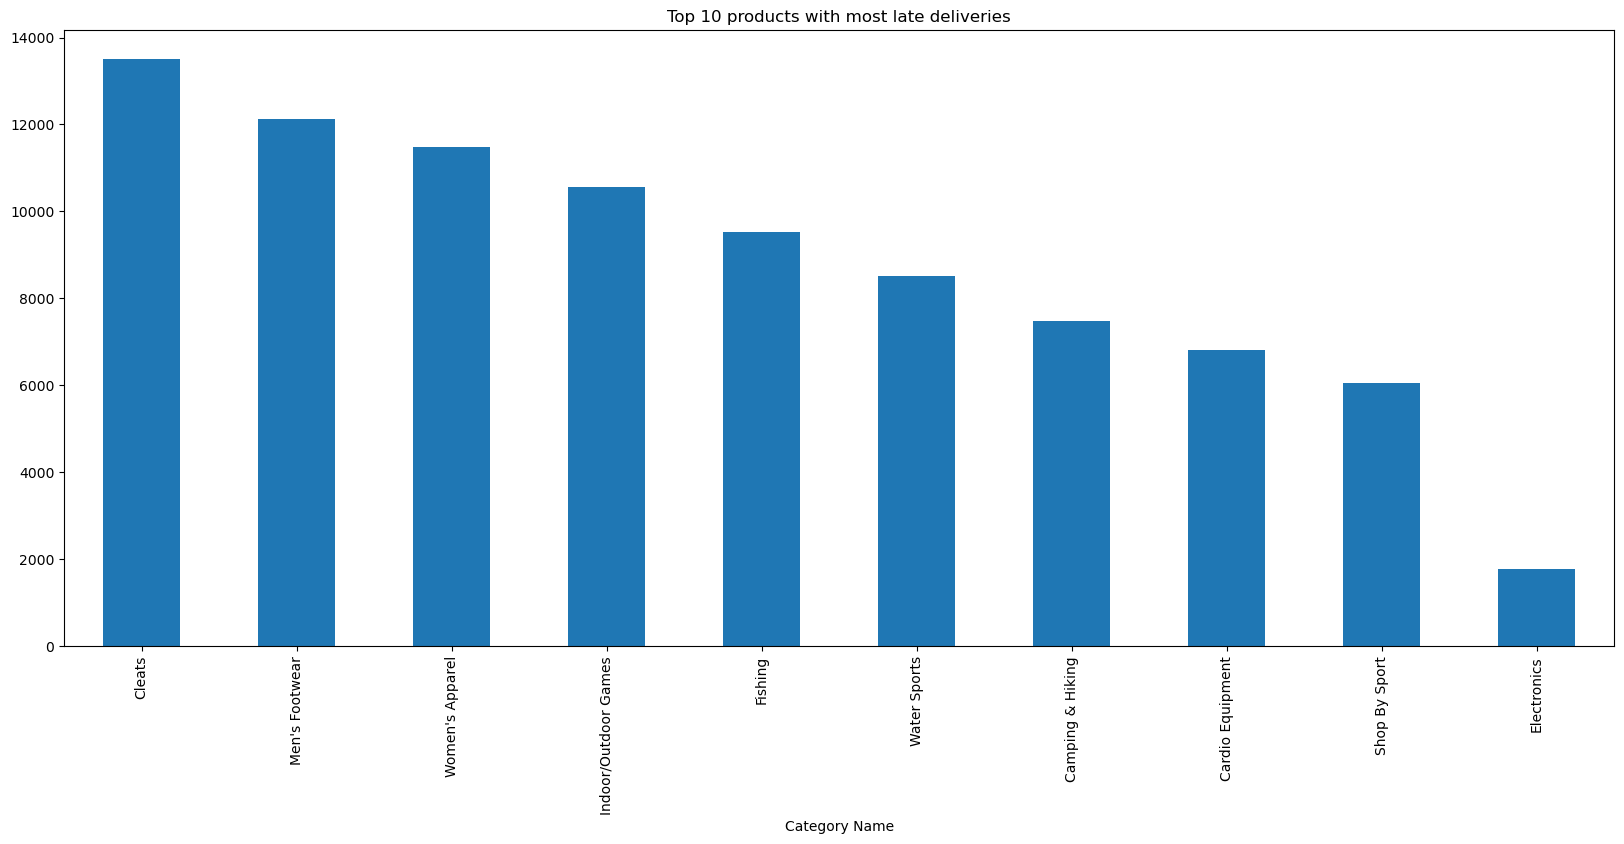

In [33]:
#Filtering columns with late delivery status
late_delivery = df1[(df1['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")

## <center> Now Lets jump into some Prediction Task.</center>
### --> Building a Regressor to determine the maximum range of shipping time, by predicting the Fastest and Normal duration for shipping of goods for both Inland and International customers.
### -->Building a Binary Classifier to classify orders with high probabilty of late delivery (Late Delivery Risk analyser).

### Now to do this Prediction Task we will require to use the important features for this purpose
### So now we will Split the data set into separate  domain(similar features) for better Modelling rather than using the Whole Dataset
### 1) Finance
### 2) Demographics
### 3) Shipment Day Estimation

In [5]:
# Finance Features
finance_features=['Benefit per order','Sales per customer','Order Item Discount','Order Item Discount Rate',
                  'Order Item Product Price','Order Item Profit Ratio']
finance=df[finance_features]
finance.head()

,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio
0,91.250000,314.640015,13.110000,0.04,327.75,0.29
1,-249.089996,311.359985,16.389999,0.05,327.75,-0.80
2,-247.779999,309.720001,18.030001,0.06,327.75,-0.80
3,22.860001,304.809998,22.940001,0.07,327.75,0.08
4,134.210007,298.250000,29.500000,0.09,327.75,0.45


In [6]:
# Shipment Features
shipment_features=['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status']
shipment=df[shipment_features]
shipment.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,South Asia,India,Bikaner,Pacific Asia,Late delivery
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,South Asia,India,Bikaner,Pacific Asia,Shipping on time
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping


### Feature Engineering


In [7]:
# Now we Know that 'order date' and 'shipping date' are categorical and we need to convert them into datetime Data Type.
df['order_date']=pd.to_datetime(df['order date (DateOrders)'])

df['shipping_date']=pd.to_datetime(df['shipping date (DateOrders)'])

In [8]:
# We will Hanlde the time variable here
# Below is the conversion the 'order date' and 'shipping date' columns into datetime format and then extract the year, month,
# and day information into separate columns for further analysis.
df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_month'] = pd.DatetimeIndex(df['order_date']).month
df['order_day'] = pd.DatetimeIndex(df['order_date']).day
df['shipping_year'] = pd.DatetimeIndex(df['shipping_date']).year
df['shipping_month'] = pd.DatetimeIndex(df['shipping_date']).month
df['shipping_day'] = pd.DatetimeIndex(df['shipping_date']).day

In [9]:
new_data_set_features=['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status','order_day','order_month','order_year',
                        'shipping_day','shipping_month','shipping_year']

In [10]:
new_data=df[new_data_set_features]
model_data=new_data
print("The shape of Model Data is:",model_data.shape)
print()
model_data.head()

The shape of Model Data is: (180519, 21)



,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,...,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,...,Indonesia,Bekasi,Pacific Asia,Advance shipping,31,1,2018,3,2,2018
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,...,India,Bikaner,Pacific Asia,Late delivery,13,1,2018,18,1,2018
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,...,India,Bikaner,Pacific Asia,Shipping on time,13,1,2018,17,1,2018
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,...,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,16,1,2018
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,...,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,15,1,2018


In [11]:
# To convert Categorical Values into Numerical lets Perform One-Hot Encoding
model_data = pd.get_dummies(model_data)
model_data.shape
# Reason for increase in numnber of columns:"If you had categorical columns with a large number of unique values,
# this could explain the significant increase in the number of columns."

(180519, 3823)

## Model Building for The Risk Late Analysis
Target Features are Days for shipping (real), Days for shipment (scheduled)

In [12]:
x= model_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)
# X is all the columns except  Days for Shipping and Das for Shipment
y= model_data[['Days for shipping (real)','Days for shipment (scheduled)']]
# Y has the Target Variables
print("The Shape of Input Features is:",x.shape)
print("The Shape of Target Features is",y.shape)

The Shape of Input Features is: (180519, 3821)
The Shape of Target Features is (180519, 2)


In [13]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.25)

In [14]:
model_tree_regressor=DecisionTreeRegressor()
model_random_regressor= RandomForestRegressor()
model_knn_regressor = KNeighborsRegressor()

In [15]:
model_tree_regressor.fit(x_train,y_train)
pred_tree_regrssor= model_tree_regressor.predict(x_test)

We tried implementing the random regressor and the knn regressor but as the Dataset is too big and beacuse of less computation  power it takes too much time and didnt showed any output.
So we just trained and tested this one Tree_Regressor Model

In [16]:
# model_random_regressor.fit(x_train,y_train)
# pred_random_regressor = model_random_regressor.predict(x_test)

In [17]:
# model_knn_regressor.fit(x_train,y_train)
# pred_knn_regressor = model_knn_regressor.predict(x_test)

## Model Evaluation

In [18]:
def metrics(y_test, pred):
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    return r2, mse, mae

# Evaluate Decision Tree Regressor
r2_tree, mse_tree, mae_tree = metrics(y_test, pred_tree_regrssor)
print("Decision Tree Regressor:")
print('The r-squared score of the model is ', r2_tree)
print('The mean squared error is', mse_tree)
print('The mean absolute error is', mae_tree)
print()

# # Evaluate Random Forest Regressor
# r2_random, mse_random, mae_random = metrics(y_test, pred_random_regressor)
# print("Random Forest Regressor:")
# print('The r-squared score of the model is ', r2_random)
# print('The mean squared error is', mse_random)
# print('The mean absolute error is', mae_random)
# print()

# # Evaluate KNN Regressor
# r2_knn, mse_knn, mae_knn = metrics(y_test, pred_knn_regressor)
# print("KNN Regressor:")
# print('The r-squared score of the model is ', r2_knn)
# print('The mean squared error is', mse_knn)
# print('The mean absolute error is', mae_knn)
# print()

Decision Tree Regressor:
The r-squared score of the model is  0.9932580293752358
The mean squared error is 0.017781963217372035
The mean absolute error is 0.016297363173055617



### Predicted Values

In [22]:
#Converting the predicted output array to dataframe
Prediction = pd.DataFrame(pred_tree_regrssor)
prediction = Prediction.rename(columns={0:'Fastest_shipment',1:'Avg_shipment'})
prediction.head(10)

,Fastest_shipment,Avg_shipment
0,3.0,4.0
1,4.0,4.0
2,2.0,4.0
3,3.0,4.0
4,2.0,4.0
5,4.0,4.0
6,3.0,4.0
7,5.0,4.0
8,3.0,4.0
9,3.0,4.0


Fastest_shipment: This column represents the predicted fastest shipment duration in days for each data point. For example, a value of 2.0 means that the model predicts the fastest shipment for that data point will take 2 days.

Avg_shipment: This column represents the predicted average shipment duration in days for each data point. For example, a value of 1.0 means that the model predicts the average shipment for that data point will take 1 day.

If the predicted fastest shipment duration is greater than the predicted average shipment duration, it indicates a heavier risk of late delivery because the scheduled days are outnumbered. Conversely, if the predicted average shipment duration is greater than the predicted fastest shipment duration, there is a higher probability for fast or early delivery of goods to customers.

In [42]:
prediction['risk'] = np.where(prediction['Avg_shipment'] >= prediction['Fastest_shipment'],0,1)
# This line of code is creating a binary indicator of risk based on whether the predicted average shipment duration is greater than or equal to the predicted fastest shipment duration. 
# A value of 0 indicates a lower risk, and a value of 1 indicates a higher risk.

In [43]:
prediction.head()

,Fastest_shipment,Avg_shipment,risk
0,2.0,1.0,1
1,3.0,4.0,0
2,4.0,4.0,0
3,2.0,4.0,0
4,6.0,4.0,1


### We can now evaluate using Confusion Matrix and Visuals

In [44]:
l=prediction['risk']
m=x_test['Late_delivery_risk']

In [45]:
# Defining a function to evaluate our statiscal model for Late_delivery_risk_prediction
def evaluation_risk_factor(l,m):
  print('1) The accuracy of the risk predictor model is :',accuracy_score(l,m))
  print('2) The AUROC score is :',roc_auc_score(l,m))
  print('3) Some of the key classification metrics are :')
  print(classification_report(l,m))
  ax=plt.subplot()
  sns.heatmap(confusion_matrix(l,m),annot=True,ax=ax,cmap='YlGnBu');
  ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
  ax.set_title('Confusion matrix for Risk Delivery classfication');

1) The accuracy of the risk predictor model is : 0.9752271216485708
2) The AUROC score is : 0.978421987184436
3) Some of the key classification metrics are :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     19224
           1       1.00      0.96      0.98     25906

    accuracy                           0.98     45130
   macro avg       0.97      0.98      0.97     45130
weighted avg       0.98      0.98      0.98     45130



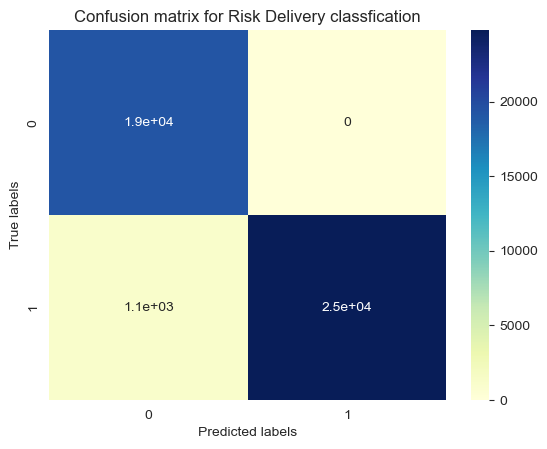

In [46]:
evaluation_risk_factor(l,m)
#1.9 * 10^4, which is equal to 19,000.

True Positive (TP): The model correctly predicted that the sample belongs to the positive class (e.g., late delivery risk) when it actually does.

False Positive (FP): The model incorrectly predicted that the sample belongs to the positive class when it does not (e.g., predicted late delivery risk when it was not late).

True Negative (TN): The model correctly predicted that the sample belongs to the negative class (e.g., not late delivery risk) when it actually does not.

False Negative (FN): The model incorrectly predicted that the sample belongs to the negative class when it actually belongs to the positive class (e.g., predicted not late delivery risk when it was late).

Lets See The Difference between the Predicted and Actual Late Delivery.

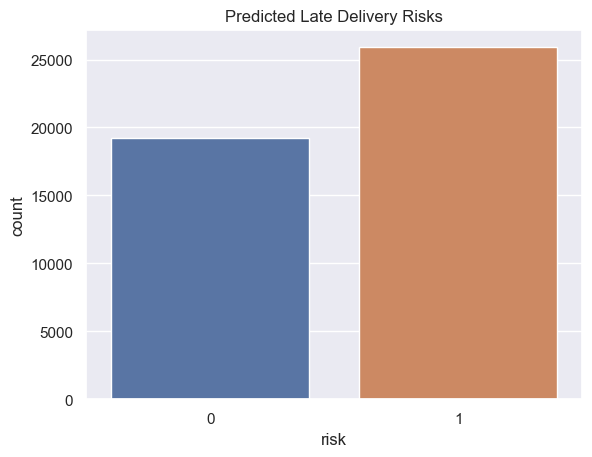

In [47]:
sns.set(style="darkgrid")
ax=sns.countplot(x="risk", data= prediction).set_title("Predicted Late Delivery Risks")

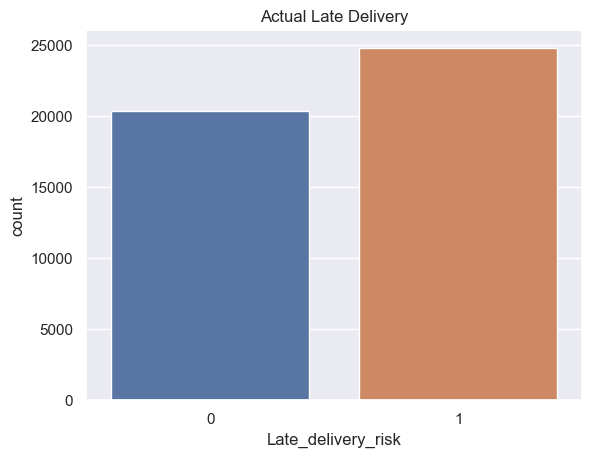

In [48]:
ax=sns.countplot(x='Late_delivery_risk',data=x_test).set_title("Actual Late Delivery")

## Now Lets Try Another Approach i.e. Using a new ML libraray Autologging ML

We will try to predict the late delivery risk

In [57]:
# Here I am creating a copy of my data to if I make changes in that one it doesnot affect my main dataset
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 62 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  int32         
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  int32         
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [58]:
df_copy['order date']= pd.to_datetime(df_copy['order date (DateOrders)'])
df_copy['shipping date']= pd.to_datetime(df_copy['shipping date (DateOrders)'])

In [59]:
# Separates columns are created here so that they can be used 
df_copy['order year']=df_copy['order date'].dt.year
df_copy['order month']=df_copy['order date'].dt.month
df_copy['order day']=df_copy['order date'].dt.day
df_copy['order hour']=df_copy['order date'].dt.hour
df_copy['order minute']=df_copy['order date'].dt.minute

df_copy['shipping year']=df_copy['shipping date'].dt.year
df_copy['shipping month']=df_copy['shipping date'].dt.month
df_copy['shipping day']=df_copy['shipping date'].dt.day
df_copy['shipping hour']=df_copy['shipping date'].dt.hour
df_copy['shipping minute']=df_copy['shipping date'].dt.minute

In [60]:
# Here We have created the features that we are going to use in our modelling
df_copy=df_copy.loc[:,['Type','Days for shipment (scheduled)','order year','order month','order day','order hour','order minute','Benefit per order','Category Name','Latitude','Longitude','Customer Segment','Department Name','Market','Order City','Order Country','Order Item Discount','Order Item Product Price','Order Item Quantity','Order Item Total','Order State','Product Name','shipping year','shipping month','shipping day','shipping hour','shipping minute','Shipping Mode','Late_delivery_risk','Order Status']]

In [61]:
# Using the Label Encoder I will be transforming the labels into Numerical Form for the dataset
le= LabelEncoder()
for i in df_copy.columns:
    if df_copy[i].dtype == 'object':
        df[i]=le.fit_transform(df_copy[i])

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int32  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   order year                     180519 non-null  int32  
 3   order month                    180519 non-null  int32  
 4   order day                      180519 non-null  int32  
 5   order hour                     180519 non-null  int32  
 6   order minute                   180519 non-null  int32  
 7   Benefit per order              180519 non-null  float64
 8   Category Name                  180519 non-null  int32  
 9   Latitude                       180519 non-null  float64
 10  Longitude                      180519 non-null  float64
 11  Customer Segment               180519 non-null  int32  
 12  Department Name               

In [62]:
# Y 1 here is our Target Label and x is our input feature
y1=df_copy['Late_delivery_risk']
y2=df_copy['Order Status']
x=df_copy.drop(['Late_delivery_risk','Order Status'],axis=1)
x=StandardScaler().fit_transform(x)

In [63]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1,y_train2,y_test2 = train_test_split(x, y1,y2,stratify=y1, test_size=0.25)

In [64]:
from sklearn.model_selection import train_test_split

In [ ]:
# !pip install AutoLogging_ML

In [ ]:
# !pip install xgboost

In [ ]:
# !pip install catboost

In [65]:
# The SimpleImputer Function is used here to fill the null values in the data if they are there
from sklearn.impute import SimpleImputer
# We will fill the Null value with the mean
imputer = SimpleImputer(strategy='mean')

x_train1_imputed = imputer.fit_transform(x_train1)
x_test1_imputed = imputer.fit_transform(x_test1)

Autologging in machine learning refers to the automatic recording and tracking of various aspects of a machine learning model's training and evaluation process. This includes metrics such as accuracy, loss, and other relevant performance indicators.


Reference:https://pypi.org/project/AutoLogging-ML/

In [66]:
from AutoLogging_ML import AutoLogger
a,mode1=AutoLogger.train_and_log_classification(x_train1_imputed,y_train1,x_test1_imputed,y_test1,size='large')
# size='large' specifies the size of the dataset, which can affect certain logging behaviors
# The function returns a trained model (a) and a mode identifier (mode1)

C:\Users\darsh\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning:

Variables are collinear



In [67]:
mode1

BaggingClassifier()

In [68]:
# This Autologger class provides few Information about models.
#Each of these models has its strengths and weaknesses, and 
# their performance can vary depending on the dataset and problem at hand.
# The classification report provides metrics to evaluate their performance on your specific dataset.
AutoLogger.get_classification_report(a,'validation')

naive bayes
              precision    recall  f1-score   support

           0       0.62      0.82      0.71     20386
           1       0.80      0.58      0.67     24744

    accuracy                           0.69     45130
   macro avg       0.71      0.70      0.69     45130
weighted avg       0.72      0.69      0.69     45130

adaboost
              precision    recall  f1-score   support

           0       0.64      0.88      0.74     20386
           1       0.86      0.58      0.70     24744

    accuracy                           0.72     45130
   macro avg       0.75      0.73      0.72     45130
weighted avg       0.76      0.72      0.72     45130

logistic regression
              precision    recall  f1-score   support

           0       0.71      0.88      0.79     20386
           1       0.88      0.71      0.78     24744

    accuracy                           0.79     45130
   macro avg       0.80      0.79      0.79     45130
weighted avg       0.80      0.79

<Axes: xlabel='validation-accuracy', ylabel='model'>

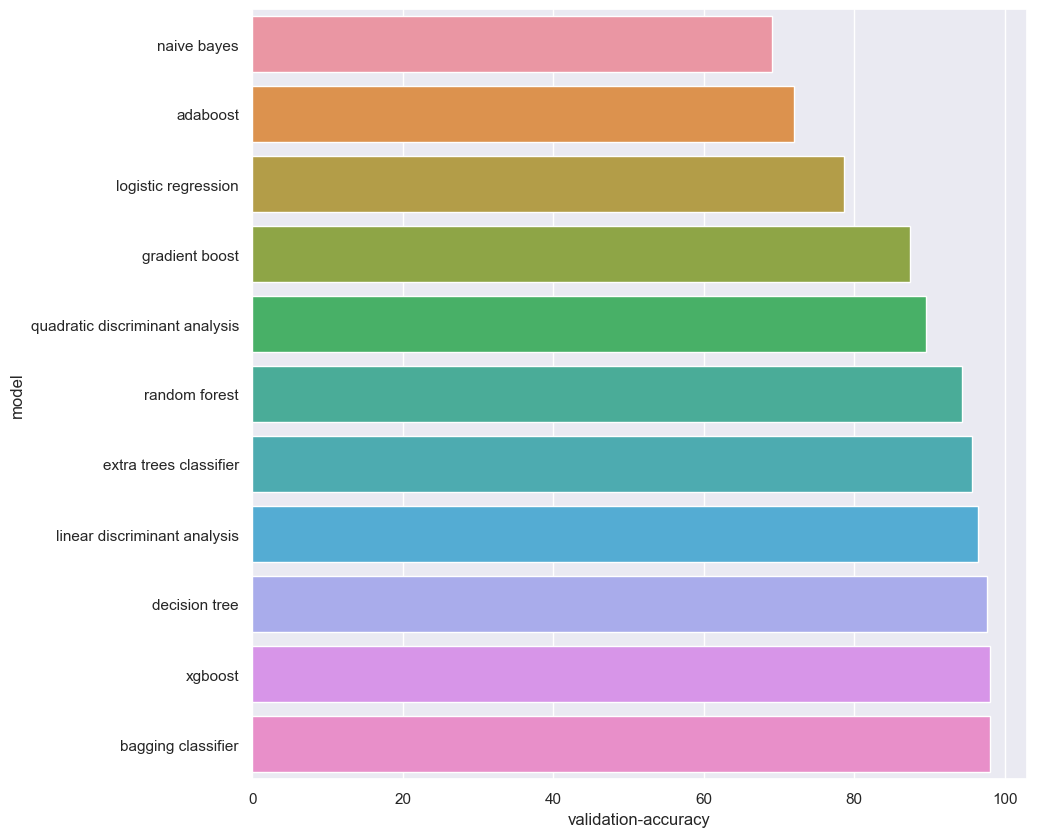

In [69]:
AutoLogger.get_metric_plot_classification(a,'validation','accuracy')


Late_delivery_risk: This appears to be a binary classification problem where the model predicts whether an order is at risk of late delivery or not.

Order Status: This could be a multi-class classification problem where the model predicts the status of an order, such as "completed," "cancelled," or "on hold."
These are the two thing the we used them as Target and the Performance of Model is Based on them.

## In above two approaches that is in first Approach we used Regressor and in the second Approach we used this Auto Loggin Library.

## Now lets Try different Classification Models separately and how they Perform the similar task of Late delivery Prediction.

### The below code aims to compare  popular machine learning classifie and measure their performance to find which one is better. Since the dataset used is related to supply chain important parameters are identified and the machine learning models are trained with the dataset for detection of fraud transactions, late delivery of orders etc below we have work on late delivery prediction.

In [70]:
train_data= df.copy()
train_data=train_data.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)

In [71]:
#It can be observed that prices has linear relation with sales. Which quarter recorded highest sales? 
#It can be found by dividing order time into years,months,week day,hour to better observe the trend.

train_data['order_year']= pd.DatetimeIndex(data['order date (DateOrders)']).year
train_data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
train_data['order_week_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday
train_data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour
train_data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

In [72]:
# We will be creating new columns for fraud order status and  late delivery status.
train_data['fraud']= np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD',1,0)
train_data['late_delivery']= np.where(train_data['Delivery Status']=='Late delivery',1,0)

In [73]:
#Now to measure machine models accurately all the columns with repeated values are dropped 
#like late_delivery_risk column because, it is known all the products with late delivery risk are delivered late.
#And Order Status column because, a new column for fraud detection iscreated there is a chance machine learning model might take values directly from these columns to predict output.

#Dropping columns with repeated values
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order_month_year','order date (DateOrders)'], axis=1, inplace=True)

In [74]:
pd.set_option('display.max_columns', None)
train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name,order_date,shipping_date,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day,order_week_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,Caguas,Puerto Rico,20755,0,PR,725.0,2,4,3,331,70,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,475,1360,73,78,327.75,3,CallyHolloway,2018-01-31 22:56:00,2018-02-03 22:56:00,2018,1,31,2018,2,3,2,22,0,0
1,3,5,4,-249.089996,311.359985,73,40,Caguas,Puerto Rico,19492,0,PR,725.0,2,4,3,391,69,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,841,1360,73,78,327.75,3,IreneLuna,2018-01-13 12:27:00,2018-01-18 12:27:00,2018,1,13,2018,1,18,5,12,0,1
2,0,4,4,-247.779999,309.720001,73,40,San Jose,EE. UU.,19491,0,CA,95125.0,2,4,3,391,69,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,841,1360,73,78,327.75,3,GillianMaldonado,2018-01-13 12:06:00,2018-01-17 12:06:00,2018,1,13,2018,1,17,5,12,0,0
3,1,3,4,22.860001,304.809998,73,40,Los Angeles,EE. UU.,19490,2,CA,90027.0,2,4,3,3226,8,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,835,1360,73,78,327.75,3,TanaTate,2018-01-13 11:45:00,2018-01-16 11:45:00,2018,1,13,2018,1,16,5,11,0,0
4,2,2,4,134.210007,298.250000,73,40,Caguas,Puerto Rico,19489,1,PR,725.0,2,4,3,3226,8,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,835,1360,73,78,327.75,3,OrliHendricks,2018-01-13 11:24:00,2018-01-15 11:24:00,2018,1,13,2018,1,15,5,11,0,0


In [75]:
# There are some columns with object type data which cannot be trained 
#in machine learning models so all the object type data is converted to int type using preprocessing label encoder library.
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])




In [76]:
train_data = train_data.select_dtypes(exclude=['datetime64[ns]'])

train_data.dtypes
# Now all the attributes data type is similar and now there will be no problem in machine learning process/Modelling

Type                               int64
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                      int64
Customer City                      int32
Customer Country                   int32
Customer Id                        int64
Customer Segment                   int64
Customer State                     int32
Customer Zipcode                 float64
Department Id                      int64
Department Name                    int64
Market                             int64
Order City                         int64
Order Country                      int64
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

### Lets Compare the Classification Models

Model parameters used are : GaussianNB()
Accuracy of late delivery status is: 84.25659206736096 %
Recall score of late delivery status is: 88.3484593228629 %
Confusion Matrix of late delivery status is: 
 [[14163  2144]
 [ 3540 16257]]
F1 score of late delivery status is: 85.11963977171581 %


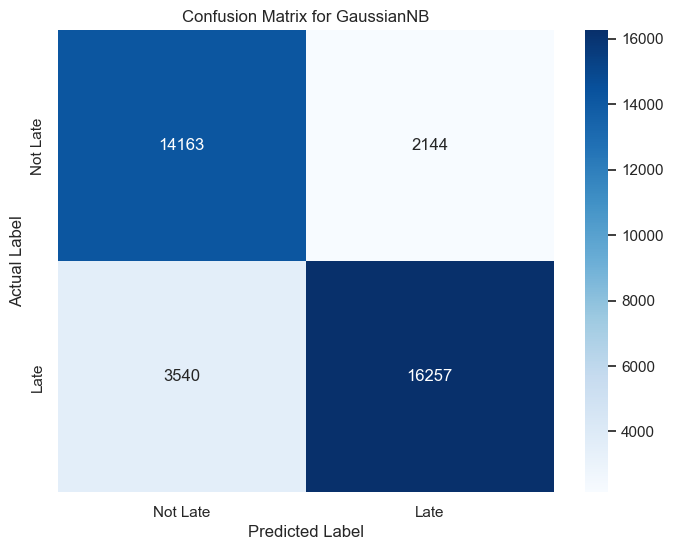

Model parameters used are : RandomForestClassifier(max_depth=10, random_state=0)
Accuracy of late delivery status is: 95.94781741635275 %
Recall score of late delivery status is: 93.11853245531515 %
Confusion Matrix of late delivery status is: 
 [[14844  1463]
 [    0 19797]]
F1 score of late delivery status is: 96.43666122707455 %


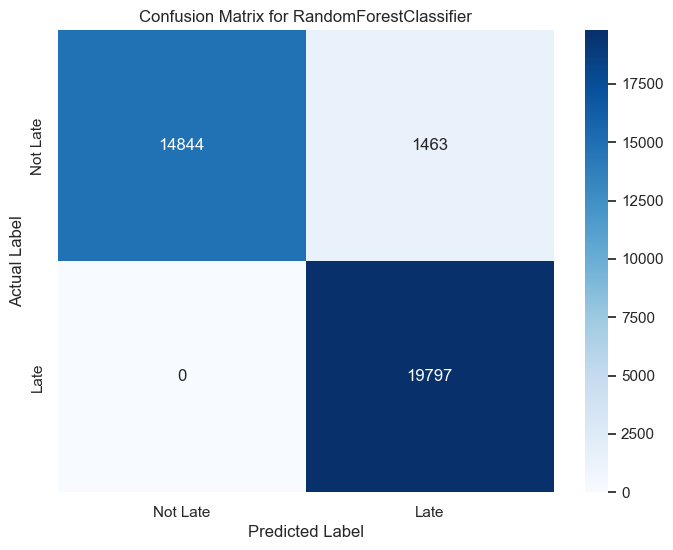

Model parameters used are : KNeighborsClassifier(n_neighbors=1)
Accuracy of late delivery status is: 79.76678484378462 %
Recall score of late delivery status is: 82.12301995474182 %
Confusion Matrix of late delivery status is: 
 [[12831  3476]
 [ 3829 15968]]
F1 score of late delivery status is: 81.38426645600265 %


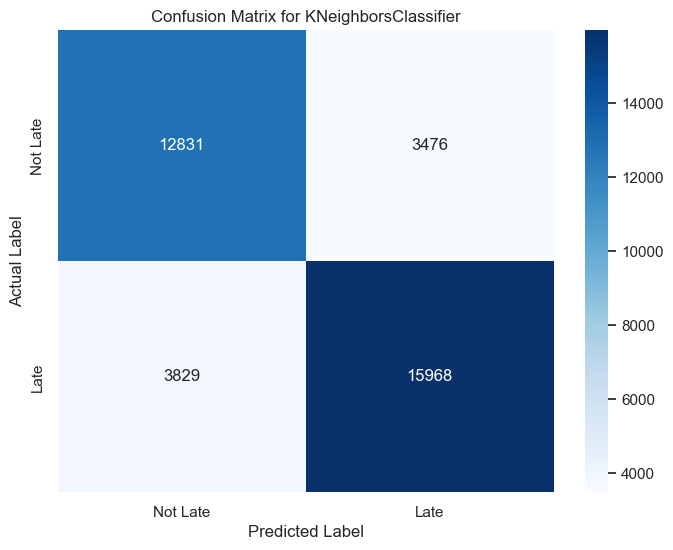

Model parameters used are : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy of late delivery status is: 98.29104808331486 %
Recall score of late delivery status is: 97.01441317776252 %
Confusion Matrix of late delivery status is: 
 [[15698   609]
 [    8 19789]]
F1 score of late d

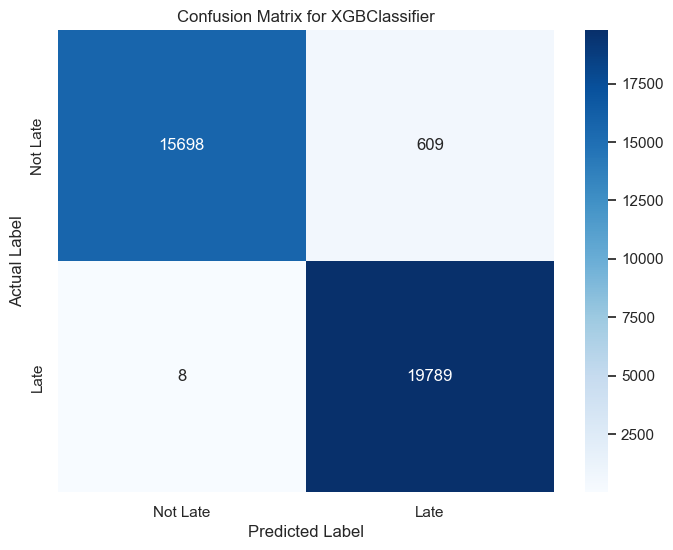

Model parameters used are : DecisionTreeClassifier()
Accuracy of late delivery status is: 98.79791712829604 %
Recall score of late delivery status is: 98.88412017167381 %
Confusion Matrix of late delivery status is: 
 [[16086   221]
 [  213 19584]]
F1 score of late delivery status is: 98.90409575273976 %


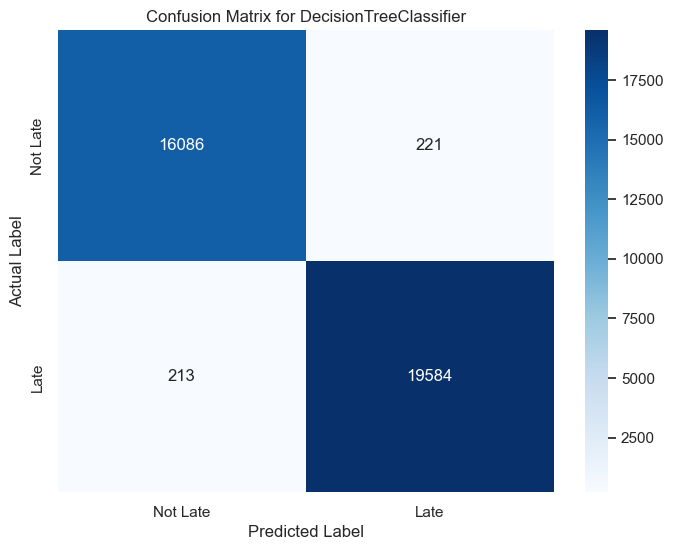

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

xl = train_data.loc[:, train_data.columns != 'late_delivery']
yl = train_data['late_delivery']
xl_train, xl_test, yl_train, yl_test = train_test_split(xl, yl, test_size=0.2, random_state=42)

# Standard scaling
sc = StandardScaler()
xl_train = sc.fit_transform(xl_train)
xl_test = sc.transform(xl_test)

def classifiermodel(model_l, xl_train, xl_test, yl_train, yl_test):
    model_l = model_l.fit(xl_train, yl_train)
    yl_pred = model_l.predict(xl_test)  
    accuracy_l = accuracy_score(yl_pred, yl_test) * 100
    recall_l = recall_score(yl_pred, yl_test) * 100
    conf_l = confusion_matrix(yl_test, yl_pred)
    f1_l = f1_score(yl_test, yl_pred) * 100
    print('Model parameters used are :', model_l)
    print('Accuracy of late delivery status is:', accuracy_l, '%')
    print('Recall score of late delivery status is:', recall_l, '%')
    print('Confusion Matrix of late delivery status is: \n', conf_l)
    print('F1 score of late delivery status is:', f1_l, '%')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_l, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Late', 'Late'], yticklabels=['Not Late', 'Late'])
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix for ' + str(model_l).split("(")[0])
    plt.show()


# Training and evaluating models for late delivery prediction
# We here below are using few models to make the predictions using the above function we already defined 
model_l = GaussianNB()
classifiermodel(model_l, xl_train, xl_test, yl_train, yl_test)

model_l = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_l, xl_train, xl_test, yl_train, yl_test)

model_l = KNeighborsClassifier(n_neighbors=1)
classifiermodel(model_l, xl_train, xl_test, yl_train, yl_test)

model_l = xgb.XGBClassifier()
classifiermodel(model_l, xl_train, xl_test, yl_train, yl_test)

model_l = tree.DecisionTreeClassifier()
classifiermodel(model_l, xl_train, xl_test, yl_train, yl_test)

In [78]:
classification_data = {'Classification Model':  ['Gausian Naive bayes','K nearest Neighbour',
                                'Random Forest','Extreme gradient boosting','Decision tree'],
        'Accuracy Score for Late Delivery':       [84.25,79.76,95.94,98.29,98.81],
        'Recall Score for Late Delivery':         [88.34,82.12,93.11,97.01,98.93],
        'F1 Score for Late Delivery':             [85.11,81.38,96.43,98.46,98.91] }
#Creating data frame with Column Names
classification_comparision = pd.DataFrame (classification_data, columns = ['Classification Model',
                                                                           'Accuracy Score for Late Delivery','Recall Score for Late Delivery','F1 Score for Late Delivery'])

classification_comparision

,Classification Model,Accuracy Score for Late Delivery,Recall Score for Late Delivery,F1 Score for Late Delivery
0,Gausian Naive bayes,84.25,88.34,85.11
1,K nearest Neighbour,79.76,82.12,81.38
2,Random Forest,95.94,93.11,96.43
3,Extreme gradient boosting,98.29,97.01,98.46
4,Decision tree,98.81,98.93,98.91


From Above Output We can say that the Decision Tree Algorithm outperfomed other classification models
and for predicting new Data it will suit the best.

### There are various options for further exploration. Using the same dataset, we may investigate the feasibility of detecting payment fraud by specifying payment-related attributes as target variables. Furthermore, using neural network models for prediction tasks and comparing their accuracy to regressors and classifiers may yield useful insights. In addition, comparing machine learning models across different datasets might provide greater insight into their performance. 